# **Classifying Clothing Images**
Now it's your turn to build a neural network. You'll using the Fashion_MNIST_dataset. A drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

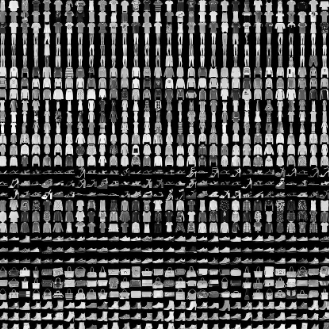

# **Building the network**
Here you should define your network. As with MNSIT, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [13]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    # make sure input tensor is flattened
    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)

    return x

# **Train the network**
Now you should create your network and train it. First you'll want to define the criterion (something like `nn.CrossEntropyLoss`) and the optimizer (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process.
- Make a forward pass through the network to get the logits.
- Use the logits to calculate the loss.
- Perform a backward pass through the network with `loss.backward()` to calculate the gradients.
- Take a step with the optimizer (hidden units, learning rate etc). you should be able to get the training loss below 0.4

In [14]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [16]:
epochs = 5
for e in range(epochs):
  running_loss = 0
  count = 0
  for images, labels in trainloader:
    logps = model(images)
    loss = criterion(logps, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    count+=1
  else:
    print(f"Training loss: {running_loss}")
    print(f"count: {count}")

Training loss: 286.6697062626481
count: 938
Training loss: 274.2877013236284
count: 938
Training loss: 265.77879566699266
count: 938
Training loss: 259.06055334955454
count: 938
Training loss: 249.9341490752995
count: 938
